# About Me: Shukurat Bello

    * BSc and MSc in Computer Science
    * Data Analyst | Data Scientist
    * Previous Internship - Women in Data Science (WiDS) Fellowship
    * Participated in the Women in Data Science Hackaton

In [1]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Data Loading and Initial Inspection

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head(10)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive

# Exploratory Data Analysis (EDA)

In [6]:
df.shape

(50000, 2)

In [7]:
# Checking for null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [9]:
# Basic statistics
print(df['review'].apply(len).describe())

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review, dtype: float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
print(df['sentiment'].unique())
print(df['sentiment'].value_counts())

['positive' 'negative']
positive    25000
negative    25000
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment distribution')

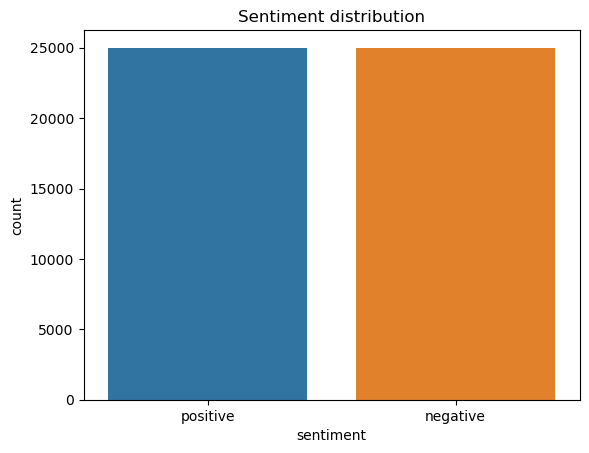

In [12]:
# Sentiment Distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

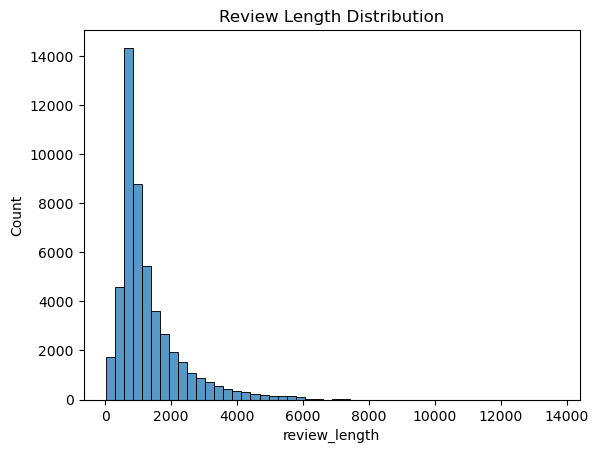

In [13]:
 # Review length distribution
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.show()

In [14]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [15]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [16]:
df['word_count'] = df['review'].apply(no_of_words)

In [17]:
df

review sentiment  \
0      One of the other reviewers has mentioned that ...  positive   
1      A wonderful little production. <br /><br />The...  positive   
2      I thought this was a wonderful way to spend ti...  positive   
3      Basically there's a family where a little boy ...  negative   
4      Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                  ...       ...   
49995  I thought this movie did a down right good job...  positive   
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  I am a Catholic taught in parochial elementary...  negative   
49998  I'm going to have to disagree with the previou...  negative   
49999  No one expects the Star Trek movies to be high...  negative   

       review_length  word_count  
0               1761         307  
1                998         162  
2                926         166  
3                748         138  
4               1317         230  
...              ...         ...  
49995           1008         194  
49996            642         112  
49997           1280         230  
49998           1234         212  
49999            678         129  

[50000 rows x 4 columns]

# Text Preprocessing and Feature Engineering

In [18]:
# Change target feature sentiment into numeric value - Positive-1, Negative-0
label = LabelEncoder()
df['sentiment'] = label.fit_transform(df['sentiment'])

In [19]:
df

review  sentiment  \
0      One of the other reviewers has mentioned that ...          1   
1      A wonderful little production. <br /><br />The...          1   
2      I thought this was a wonderful way to spend ti...          1   
3      Basically there's a family where a little boy ...          0   
4      Petter Mattei's "Love in the Time of Money" is...          1   
...                                                  ...        ...   
49995  I thought this movie did a down right good job...          1   
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0   
49997  I am a Catholic taught in parochial elementary...          0   
49998  I'm going to have to disagree with the previou...          0   
49999  No one expects the Star Trek movies to be high...          0   

       review_length  word_count  
0               1761         307  
1                998         162  
2                926         166  
3                748         138  
4               1317         230  
...              ...         ...  
49995           1008         194  
49996            642         112  
49997           1280         230  
49998           1234         212  
49999            678         129  

[50000 rows x 4 columns]

In [20]:
stop_words = set(stopwords.words('english'))

def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [21]:
# Apply preprocessing to the reviews
df['review'] = df['review'].apply(data_processing)

In [22]:
# Download required NLTK data
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shbel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Check the first few rows to ensure preprocessing is correct
print(df['review'].head())

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review, dtype: object


In [24]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  419


In [25]:
df = df.drop_duplicates('review')

In [26]:
# Combine all reviews into a single string
all_reviews = ' '.join(df['review'])

# Check the length of the combined text to ensure it's not empty
print(len(all_reviews))

41628007


## Stemming
>  Stemming is an important text preprocessing technique used in Natural Language Processing (NLP) tasks, including sentiment analysis. It serves to reduce words to their base or root form. In this project, stemming plays a crucial role by helping to standardize words, which can improve the effectiveness of the model.

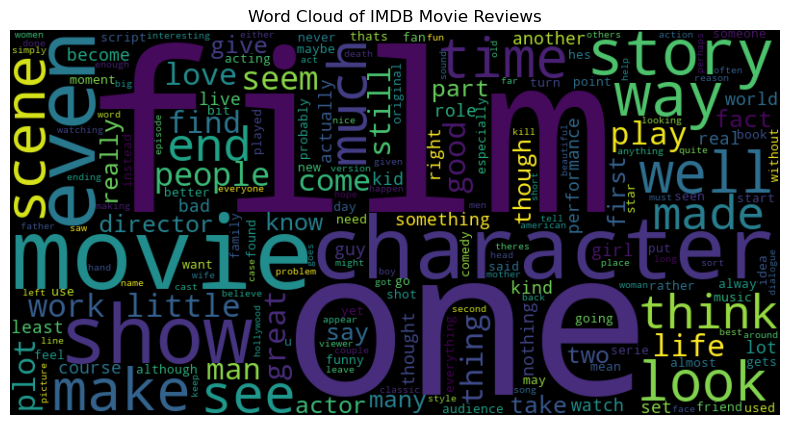

In [27]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of IMDB Movie Reviews')
plt.show()

In [28]:
# Performing Stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [29]:
df.review = df['review'].apply(lambda x: stemming(x))

C:\Users\shbel\AppData\Local\Temp\ipykernel_35580\622395023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review = df['review'].apply(lambda x: stemming(x))


In [30]:
print(df.review)

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49578, dtype: object


In [31]:
df['new_word_count'] = df['review'].apply(no_of_words)
df.head()

C:\Users\shbel\AppData\Local\Temp\ipykernel_35580\2851877265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_word_count'] = df['review'].apply(no_of_words)


review  sentiment  \
0  one reviewers mentioned watching 1 oz episode ...          1   
1  wonderful little production filming technique ...          1   
2  thought wonderful way spend time hot summer we...          1   
3  basically theres family little boy jake thinks...          0   
4  petter matteis love time money visually stunni...          1   

   review_length  word_count  new_word_count  
0           1761         307             168  
1            998         162              84  
2            926         166              86  
3            748         138              67  
4           1317         230             125

In [32]:
# Separate Positive and Negative Reviews
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  \
0  one reviewers mentioned watching 1 oz episode ...          1   
1  wonderful little production filming technique ...          1   
2  thought wonderful way spend time hot summer we...          1   
4  petter matteis love time money visually stunni...          1   
5  probably alltime favorite movie story selfless...          1   

   review_length  word_count  new_word_count  
0           1761         307             168  
1            998         162              84  
2            926         166              86  
4           1317         230             125  
5            656         119              58

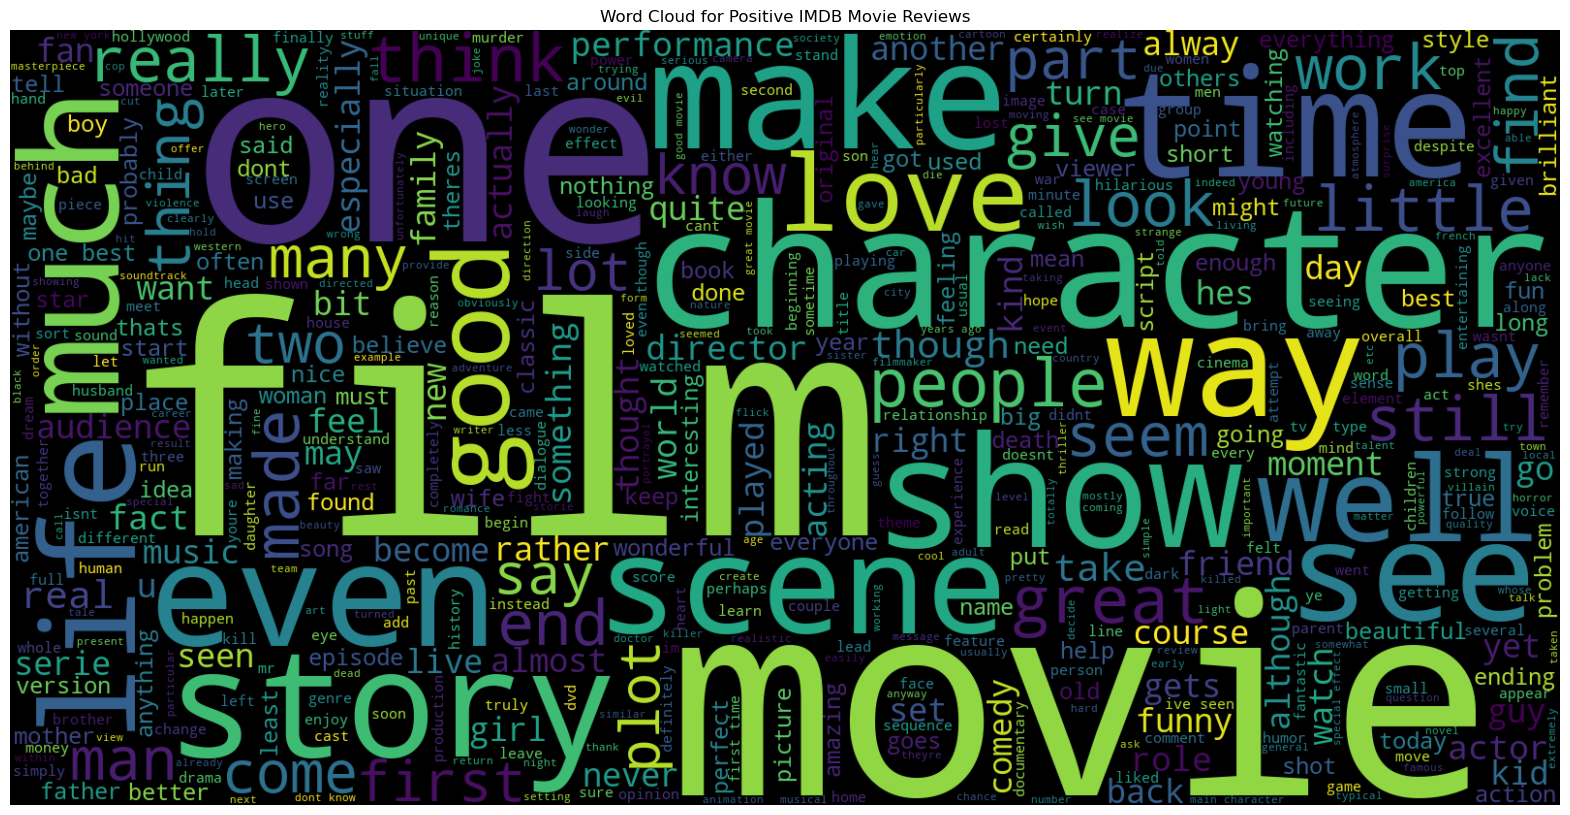

In [33]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')

wordcloud = WordCloud(max_words =500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive IMDB Movie Reviews')
plt.show()

In [34]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(20)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971),
 ('first', 8818),
 ('films', 8433),
 ('love', 8363),
 ('people', 8333),
 ('best', 8268)]

In [35]:
pos_words = pd.DataFrame(count.most_common(20))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

In [36]:
px.bar(pos_words, x='count', y='word', title='Common Words in Positive Reviews', color='count')

In [37]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

review  sentiment  \
3   basically theres family little boy jake thinks...          0   
7   show amazing fresh innovative idea 70s first a...          0   
8   encouraged positive comments film looking forw...          0   
10  phil alien one quirky films humour based aroun...          0   
11  saw movie 12 came recall scariest scene big bi...          0   

    review_length  word_count  new_word_count  
3             748         138              67  
7             934         174              83  
8             681         130              64  
10            578          96              51  
11            937         180              84

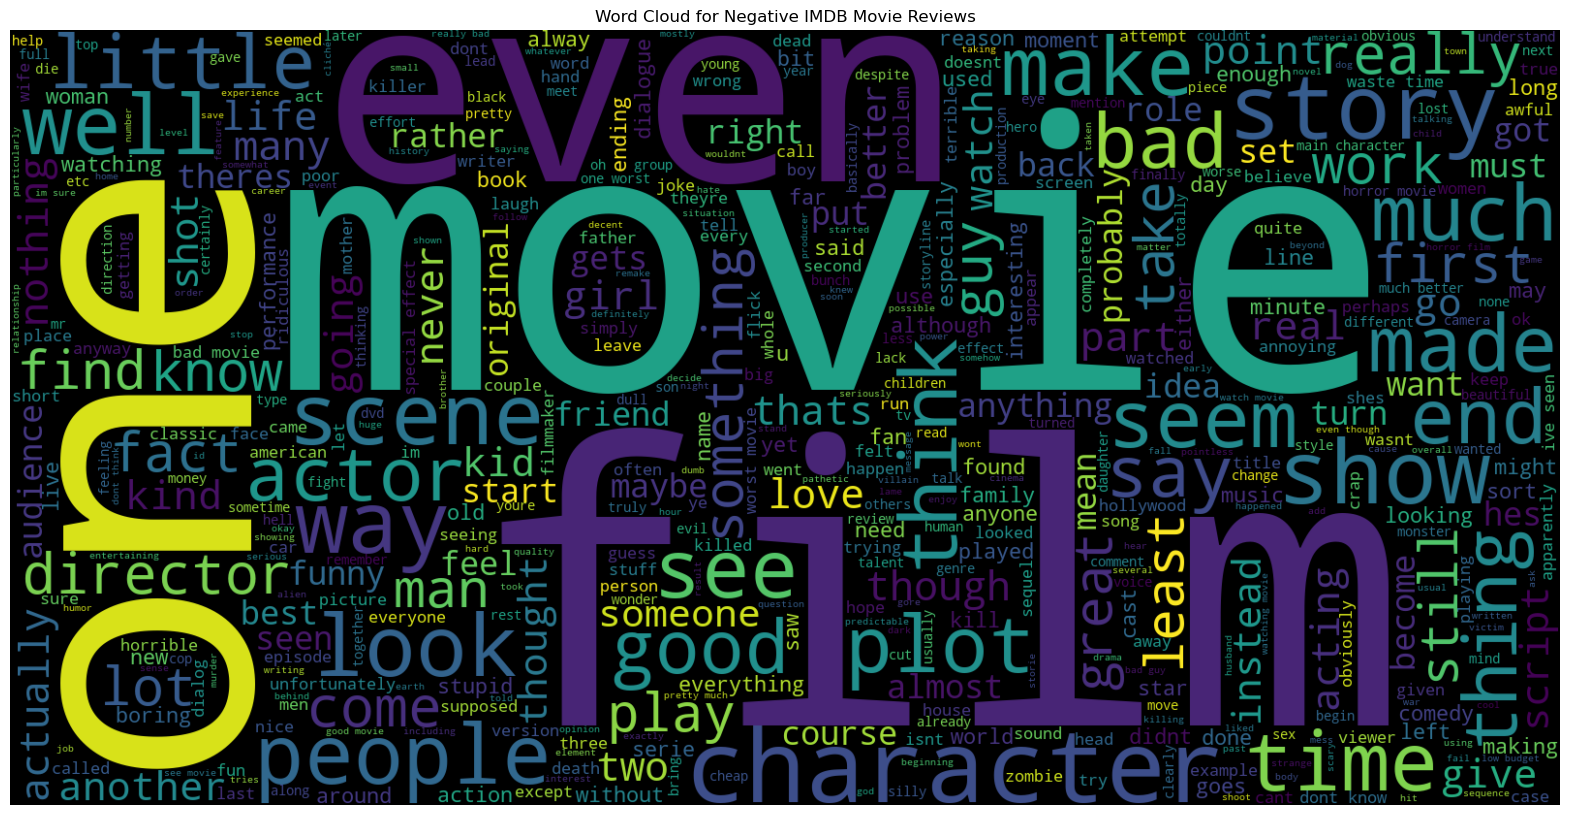

In [38]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')

wordcloud = WordCloud(max_words =500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative IMDB Movie Reviews')
plt.show()

In [39]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(20)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563),
 ('people', 8988),
 ('could', 8917),
 ('make', 8901),
 ('made', 8299),
 ('movies', 8284)]

In [40]:
neg_words = pd.DataFrame(count.most_common(20))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [41]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='count')

# Feature Selection and Extraction

In [42]:
# Features
X = df['review']
Y = df['sentiment']

In [43]:
# Transform each text into a vector of word counts
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [45]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


### Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #model performance

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_model_pred = log_model.predict(x_test)
log_model_acc = accuracy_score(log_model_pred, y_test)
print("Test accuracy: {:.2f}%".format(log_model_acc*100))

Test accuracy: 89.00%


In [47]:
print(confusion_matrix(y_test, log_model_pred))
print("\n")
print(classification_report(y_test, log_model_pred))

[[6453  908]
 [ 728 6785]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



## Multinomial Naive Bayes classifier

In [56]:
# Initialize the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

# Make predictions on the test data
nb_model_pred = nb_model.predict(x_test)
nb_model_acc = accuracy_score(y_test, nb_model_pred)
print("Test accuracy: {:.2f}%".format(nb_model_acc*100))

# Print the classification report
print(classification_report(y_test, nb_model_pred))

Test accuracy: 86.44%
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7361
           1       0.87      0.86      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

# Print the classification report
print(classification_report(y_test, y_pred))

## Support Vector Classifier

In [49]:
svc_model = LinearSVC()
svc_model.fit(x_train, y_train)
svc_model_pred = svc_model.predict(x_test)
svc_model_acc = accuracy_score(svc_model_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_model_acc*100))

Test accuracy: 89.22%


In [50]:
print(confusion_matrix(y_test, svc_model_pred))
print("\n")
print(classification_report(y_test, svc_model_pred))

[[6504  857]
 [ 747 6766]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



> The best performing model is the Support Model Classifier

In [51]:
# improve the performance of the SVC model

from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1,1,10,100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc_model, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.1s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.3s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.4s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.3s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.2s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.2s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.7s
[CV 2/5] END ...................C=1, loss=hinge;,

C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END .................C=100, loss=hinge;, score=0.874 total time=  13.7s
[CV 4/5] END .................C=100, loss=hinge;, score=0.880 total time=   5.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END .................C=100, loss=hinge;, score=0.878 total time=  14.4s
[CV 1/5] END .........C=100, loss=squared_hinge;, score=0.877 total time=   2.8s
[CV 2/5] END .........C=100, loss=squared_hinge;, score=0.882 total time=   6.5s
[CV 3/5] END .........C=100, loss=squared_hinge;, score=0.875 total time=   9.0s
[CV 4/5] END .........C=100, loss=squared_hinge;, score=0.881 total time=  10.4s
[CV 5/5] END .........C=100, loss=squared_hinge;, score=0.878 total time=  10.6s


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [52]:
print("Best Validation Score: {:.2f}%".format(grid.best_score_))
print("Best Parameters: ", grid.best_params_)

Best Validation Score: 0.89%
Best Parameters:  {'C': 1, 'loss': 'hinge'}


### Tuned Linear SVC

In [53]:
# Apply the best parameters to the SVC model
svc_model = LinearSVC(C=1, loss= 'hinge')
svc_model.fit(x_train, y_train)
svc_model_pred = svc_model.predict(x_test)
svc_model_acc = accuracy_score(svc_model_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_model_acc*100))

Test accuracy: 89.41%


In [54]:
print(confusion_matrix(y_test, svc_model_pred))
print("\n")
print(classification_report(y_test, svc_model_pred))

[[6511  850]
 [ 725 6788]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.90      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

